In [1]:
import pandas as pd
import numpy as np

In [2]:
Dati_DB = pd.read_csv("Export_Scaricato_23Gennaio2017.csv", 
                      header = 0, low_memory = False)

In [3]:
Dati_DB[['Day','Month','Year']] = Dati_DB.Data_contatto.str.split('/', expand=True)
Dati_DB["Year"] = Dati_DB["Year"].astype(int)
Dati_DB["Month"] = Dati_DB["Month"].astype(int)
Dati_DB["Day"] = Dati_DB["Day"].astype(int)

### Filtering for the last 6 months

In [4]:
Dati_DB = Dati_DB[Dati_DB["Year"] == 2017]
Dati_DB = Dati_DB[Dati_DB['Month'].between(7, 12, inclusive=True)]
Dati_DB = Dati_DB[Dati_DB['Coach'].notnull()]
Dati_DB =  Dati_DB[~Dati_DB['Motivazione'].isin(['TELESURVEY PRIMO CONTATTO', 'NUMERO DI TELEFONO NON VALIDO'])]

### Eligible Users

In [5]:
Eligible_Users = Dati_DB[Dati_DB["Progressivo_Follow_Up"] == 1].fillna("NaN").groupby(["Month"])["User_ID"].count()

In [6]:
Eligible_Users

Month
7      4832
8      9476
9     12616
10    15189
11    15222
12    15902
Name: User_ID, dtype: int64

Total Eligible Users

In [7]:
Eligible_Users.sum()

73237

In [8]:
Dati_DB['Risultato_contatto_Whatsapp'] = Dati_DB['Risultato_contatto_Whatsapp'].str.replace("Ha visualizzato e interagito", "1")
Dati_DB['Risultato_contatto_Whatsapp'] = Dati_DB['Risultato_contatto_Whatsapp'].str.replace("Non ha visualizzato", "0")
Dati_DB['Risultato_contatto_Whatsapp'] = Dati_DB['Risultato_contatto_Whatsapp'].str.replace("Ha visualizzato ma non ha interagito", "0")
Dati_DB['Risultato_contatto_Whatsapp'] = Dati_DB['Risultato_contatto_Whatsapp'].fillna('0')
Dati_DB['Risultato_contatto_Whatsapp'] = Dati_DB['Risultato_contatto_Whatsapp'].astype(int)

In [9]:
Dati_DB['Risultato_contatto_Whatsapp'].unique()

array([1, 0])

### Interaction Rate

In [10]:
Interaction_Rate = Dati_DB.groupby(['Risultato_contatto_Whatsapp']).agg({'Risultato_contatto_Whatsapp': 'count'})
(Interaction_Rate['Risultato_contatto_Whatsapp']  / Interaction_Rate['Risultato_contatto_Whatsapp'].sum()).round(2)

Risultato_contatto_Whatsapp
0    0.51
1    0.49
Name: Risultato_contatto_Whatsapp, dtype: float64

In [11]:
Dual_Exclusive = Dati_DB[["User_ID", "Tipo_di_Utilizzo", "Month"]].copy()
Dual_Exclusive = Dual_Exclusive[Dual_Exclusive['Tipo_di_Utilizzo'].notnull()]
Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].str.replace("Esclusivo", "1")
Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].str.replace("Prevalente", "0")
Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].str.replace("Mai", "0")
Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].str.replace("Occasionale/Duale", "2")
#Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].fillna('0')
Dual_Exclusive['Tipo_di_Utilizzo'] = Dual_Exclusive['Tipo_di_Utilizzo'].astype(int)

In [12]:
Dual_Exclusive['Tipo_di_Utilizzo'].unique()

array([1, 0, 2])

In [13]:
Dual_Exclusive = Dual_Exclusive.groupby(['Month','Tipo_di_Utilizzo']).agg({'Tipo_di_Utilizzo': 'count'})
Dual_Exclusive = Dual_Exclusive.groupby(level=0).apply(lambda x:
                                                  x / float(x.sum())).round(2)

### Dual and exclusive : Tipo_di_Utilizzo = 
0(Mai, Prevalente)  
1(Esclusivo)  
2(Occasionale/Duale)
#### Do not update the chart with this data - it is to be updated by the data from the research agency

In [14]:
Dual_Exclusive

Tipo_di_Utilizzo
Month Tipo_di_Utilizzo                  
7     0                             0.35
      1                             0.50
      2                             0.16
8     0                             0.50
      1                             0.40
      2                             0.10
9     0                             0.49
      1                             0.44
      2                             0.07
10    0                             0.29
      1                             0.67
      2                             0.04
11    0                             0.26
      1                             0.69
      2                             0.05
12    0                             0.26
      1                             0.69
      2                             0.05

### interaction rate per channel over time

In [15]:
Dati_DB['Contatto_Lending'] = Dati_DB['Contatto_Lending'].fillna('0')
Dati_DB['Contatto_Lending'] = Dati_DB['Contatto_Lending'].astype(int)

In [16]:
Interaction_Rate_Channel = Dati_DB[["User_ID",'Month','Fonte_acquisto','Risultato_contatto_Whatsapp', "Contatto_Lending"]].copy()
Interaction_Rate_Channel = Interaction_Rate_Channel.groupby(['Month','Fonte_acquisto','Contatto_Lending','Risultato_contatto_Whatsapp']).agg({'User_ID': 'count'})
Interaction_Rate_Channel = Interaction_Rate_Channel.groupby(level=(0,1,2)).apply(lambda x:
                                                  x / float(x.sum())).round(2).reset_index()

Interaction_Rate_Channel = Interaction_Rate_Channel[Interaction_Rate_Channel["Risultato_contatto_Whatsapp"] == 1]

In [17]:
Interaction_Rate_Channel

,Month,Fonte_acquisto,Contatto_Lending,Risultato_contatto_Whatsapp,User_ID
1,7,ALTRO,0,1,0.49
3,7,ALTRO,1,1,0.44
5,7,BOUTIQUE,0,1,0.53
7,7,BOUTIQUE,1,1,0.55
9,7,ECOMMERCE,0,1,0.49
11,7,ECOMMERCE,1,1,0.47
13,7,EMBASSY,0,1,0.53
15,7,EMBASSY,1,1,0.47
17,7,IQOS STORE,0,1,0.49
19,7,IQOS STORE,1,1,0.48


### Average

In [18]:
### IQOS Store
print("IQOS STORE:")
print("   IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 0').User_ID.mean())
####Embassy
print("EMBASSY:")
print("   IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 0').User_ID.mean())
####ECommerce
print("ECOMMERCE:")
print("   IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 0').User_ID.mean())
####BOUTIQUE
print("BOUTIQUE:")
print("   IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 0').User_ID.mean())
####BOUTIQUE
print("ALTRO:")
print("   IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Interaction_Rate_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 0').User_ID.mean())

IQOS STORE:
   IQOS Coach - 
0.471666666667
   No IQOS Coach - 
0.483333333333
EMBASSY:
   IQOS Coach - 
0.406666666667
   No IQOS Coach - 
0.513333333333
ECOMMERCE:
   IQOS Coach - 
0.483333333333
   No IQOS Coach - 
0.518333333333
BOUTIQUE:
   IQOS Coach - 
0.501666666667
   No IQOS Coach - 
0.51
ALTRO:
   IQOS Coach - 
0.481666666667
   No IQOS Coach - 
0.478333333333


### Aggregated Interaction Over time

In [19]:
Interaction_Rate_Channel["Contatto_Lending"].unique()

array([0, 1])

In [20]:
Interaction_Rate_Aggregated = Dati_DB[["User_ID",'Month','Risultato_contatto_Whatsapp', "Contatto_Lending"]].copy()
Interaction_Rate_Aggregated = Interaction_Rate_Aggregated.groupby(['Month','Contatto_Lending','Risultato_contatto_Whatsapp']).agg({'User_ID': 'count'})
Interaction_Rate_Aggregated = Interaction_Rate_Aggregated.groupby(level=(0,1)).apply(lambda x:
                                                 x / float(x.sum())).round(2).reset_index()

Interaction_Rate_Aggregated = Interaction_Rate_Aggregated[Interaction_Rate_Aggregated["Risultato_contatto_Whatsapp"] == 1]

In [21]:
Interaction_Rate_Aggregated

,Month,Contatto_Lending,Risultato_contatto_Whatsapp,User_ID
1,7,0,1,0.49
3,7,1,1,0.48
5,8,0,1,0.42
7,8,1,1,0.41
9,9,0,1,0.48
11,9,1,1,0.47
13,10,0,1,0.51
15,10,1,1,0.48
17,11,0,1,0.53
19,11,1,1,0.53


### Lead time per channel

In [84]:
Dati_DB["Data_contatto"] = pd.to_datetime(Dati_DB["Data_contatto"],dayfirst=True)
Dati_DB["Data_Acquisto"] = pd.to_datetime(Dati_DB["Data_Acquisto"],dayfirst=True)
Dati_DB=Dati_DB[Dati_DB['Progressivo_Follow_Up']==1]
Dati_DB=Dati_DB[Dati_DB['TIPOLOGIA_UTENTE']!='UTENTI DELAYED ']

In [85]:
Dati_DB["Lead_Time"] = (Dati_DB["Data_contatto"] - Dati_DB["Data_Acquisto"]).dt.days

In [86]:
Lead_Time_Channel = Dati_DB[["User_ID",'Month','Fonte_acquisto', "Contatto_Lending", "Lead_Time"]].copy()
#Lead_Time_Channel = Lead_Time_Channel[Lead_Time_Channel['Lead_Time']<=40]#.between(1, 7, inclusive=True)
Lead_Time_Channel = Lead_Time_Channel[Lead_Time_Channel['Lead_Time'].between(0, 30, inclusive=True)]
Lead_Time_Channel = (Lead_Time_Channel.groupby(['Month','Fonte_acquisto','Contatto_Lending']).agg({'Lead_Time': 'mean'})).round(2).reset_index()

In [87]:
Lead_Time_Channel

,Month,Fonte_acquisto,Contatto_Lending,Lead_Time
0,7,ALTRO,0,10.83
1,7,ALTRO,1,11.14
2,7,BOUTIQUE,0,9.73
3,7,BOUTIQUE,1,13.36
4,7,ECOMMERCE,0,10.90
5,7,ECOMMERCE,1,10.92
6,7,EMBASSY,0,11.31
7,7,EMBASSY,1,12.54
8,7,IQOS STORE,0,10.39
9,7,IQOS STORE,1,11.66


### Average

In [55]:
### IQOS Store
print("IQOS STORE:")
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 0').Lead_Time.mean())
####Embassy
print("EMBASSY:")
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 0').Lead_Time.mean())
####ECommerce
print("ECOMMERCE:")
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 0').Lead_Time.mean())
####BOUTIQUE
print("BOUTIQUE:")
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 0').Lead_Time.mean())
####BOUTIQUE
print("ALTRO:")
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 0').Lead_Time.mean())

IQOS STORE:
   IQOS Coach - 
14.7983333333
   No IQOS Coach - 
10.6666666667
EMBASSY:
   IQOS Coach - 
15.795
   No IQOS Coach - 
10.29
ECOMMERCE:
   IQOS Coach - 
10.8733333333
   No IQOS Coach - 
10.0183333333
BOUTIQUE:
   IQOS Coach - 
14.955
   No IQOS Coach - 
11.5816666667
ALTRO:
   IQOS Coach - 
13.6616666667
   No IQOS Coach - 
11.6066666667


### Aggregated Lead Time

In [89]:
Lead_Time_Aggregated = Dati_DB[["TIPOLOGIA_UTENTE","User_ID",'Month', "Contatto_Lending", "Lead_Time","Progressivo_Follow_Up"]].copy()
#Lead_Time_Channel = Lead_Time_Channel[Lead_Time_Channel['Lead_Time']<=40]#.between(1, 7, inclusive=True)
Lead_Time_Aggregated = Lead_Time_Aggregated[Lead_Time_Aggregated['Progressivo_Follow_Up']==1]
Lead_Time_Aggregated = Lead_Time_Aggregated[Lead_Time_Aggregated['TIPOLOGIA_UTENTE']!='UTENTI DELAYED ']
Lead_Time_Aggregated = Lead_Time_Aggregated[Lead_Time_Aggregated['Lead_Time'].between(0, 30, inclusive=True)]
Lead_Time_Aggregated = (Lead_Time_Aggregated.groupby(['Month','Contatto_Lending']).agg({'Lead_Time': 'mean'})).round(2).reset_index()

In [90]:
Lead_Time_Aggregated

,Month,Contatto_Lending,Lead_Time
0,7,0,10.55
1,7,1,11.55
2,8,0,18.51
3,8,1,16.42
4,9,0,11.88
5,9,1,10.61
6,10,0,6.48
7,10,1,10.07
8,11,0,7.94
9,11,1,12.18


In [91]:
Lead_Time_Aggregated.groupby('Contatto_Lending').mean()

,Month,Lead_Time
Contatto_Lending,,
0,9.5,10.018333
1,9.5,11.863333


In [88]:
Lead_Time_Aggregated.mean()

Month         9.500000
Lead_Time    10.941667
dtype: float64

### Average

In [29]:
print("   IQOS Coach - ")
print(Lead_Time_Channel.query('Contatto_Lending == 1').Lead_Time.mean())
print("   No IQOS Coach - ")
print(Lead_Time_Channel.query('Contatto_Lending == 0').Lead_Time.mean())

   IQOS Coach - 
18.230000000000004
   No IQOS Coach - 
13.66878787878788


In [30]:
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

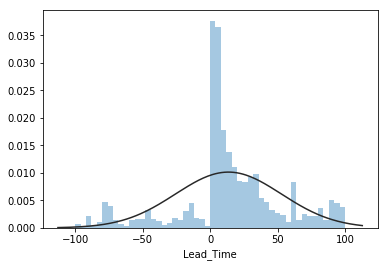

In [31]:
ax = sns.distplot(Dati_DB['Lead_Time'][Dati_DB['Lead_Time'].between(-100, 100, inclusive=True)],fit=norm, kde=False)

### Conversion Rate Per Channel

In [32]:
Conversion_Channel = Dati_DB[["User_ID",'Month',"Contatto_Lending","Fonte_acquisto","TIPOLOGIA_UTENTE", "Risultato_contatto_Whatsapp", "Tipo_di_Utilizzo"]].copy()
Conversion_Channel = Conversion_Channel[Conversion_Channel['TIPOLOGIA_UTENTE'] != "UTENTI DELAYED "]
Conversion_Channel = Conversion_Channel[Conversion_Channel['Risultato_contatto_Whatsapp'] == 1]
Conversion_Channel = Conversion_Channel[Conversion_Channel["Tipo_di_Utilizzo"].notnull()]
Conversion_Channel = Conversion_Channel.groupby(['Month','Fonte_acquisto',"Contatto_Lending","Tipo_di_Utilizzo"]).agg({'User_ID': 'count'})
Conversion_Channel = Conversion_Channel.groupby(level=(0,1,2)).apply(lambda x:
                                                 x / float(x.sum())).round(2).reset_index()
Conversion_Channel = Conversion_Channel[Conversion_Channel["Tipo_di_Utilizzo"] == "Esclusivo"]

In [33]:
Conversion_Channel

,Month,Fonte_acquisto,Contatto_Lending,Tipo_di_Utilizzo,User_ID
0,7,ALTRO,0,Esclusivo,0.50
4,7,ALTRO,1,Esclusivo,0.72
8,7,BOUTIQUE,0,Esclusivo,0.61
12,7,BOUTIQUE,1,Esclusivo,0.71
14,7,ECOMMERCE,0,Esclusivo,0.33
18,7,ECOMMERCE,1,Esclusivo,0.82
21,7,EMBASSY,0,Esclusivo,0.60
25,7,EMBASSY,1,Esclusivo,1.00
26,7,IQOS STORE,0,Esclusivo,0.54
30,7,IQOS STORE,1,Esclusivo,0.69


### Average

In [34]:
### IQOS Store
print("IQOS STORE:")
print("   IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "IQOS STORE" & Contatto_Lending == 0').User_ID.mean())
####Embassy
print("EMBASSY:")
print("   IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "EMBASSY" & Contatto_Lending == 0').User_ID.mean())
####ECommerce
print("ECOMMERCE:")
print("   IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "ECOMMERCE" & Contatto_Lending == 0').User_ID.mean())
####BOUTIQUE
print("BOUTIQUE:")
print("   IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "BOUTIQUE" & Contatto_Lending == 0').User_ID.mean())
####BOUTIQUE
print("ALTRO:")
print("   IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Channel.query('Fonte_acquisto == "ALTRO" & Contatto_Lending == 0').User_ID.mean())

IQOS STORE:
   IQOS Coach - 
0.6866666666666666
   No IQOS Coach - 
0.5533333333333333
EMBASSY:
   IQOS Coach - 
0.6066666666666667
   No IQOS Coach - 
0.5216666666666666
ECOMMERCE:
   IQOS Coach - 
0.7716666666666666
   No IQOS Coach - 
0.4283333333333334
BOUTIQUE:
   IQOS Coach - 
0.7366666666666667
   No IQOS Coach - 
0.5866666666666667
ALTRO:
   IQOS Coach - 
0.7366666666666667
   No IQOS Coach - 
0.5266666666666666


### Aggregated Conversion Rate

In [252]:
Conversion_Aggregated = Dati_DB[["User_ID",'Month',"Contatto_Lending","TIPOLOGIA_UTENTE", "Risultato_contatto_Whatsapp", "Tipo_di_Utilizzo"]].copy()
Conversion_Aggregated = Conversion_Aggregated[Conversion_Aggregated['TIPOLOGIA_UTENTE'] != "UTENTI DELAYED "]
Conversion_Aggregated = Conversion_Aggregated[Conversion_Aggregated['Risultato_contatto_Whatsapp'] == 1]
Conversion_Aggregated = Conversion_Aggregated[Conversion_Aggregated["Tipo_di_Utilizzo"].notnull()]
Conversion_Aggregated = Conversion_Aggregated.groupby(['Month',"Contatto_Lending","Tipo_di_Utilizzo"]).agg({'User_ID': 'count'})
Conversion_Aggregated = Conversion_Aggregated.groupby(level=(0,1)).apply(lambda x:
                                                  x / float(x.sum())).round(2).reset_index()
Conversion_Aggregated = Conversion_Aggregated[Conversion_Aggregated["Tipo_di_Utilizzo"] == "Esclusivo"]

In [253]:
Conversion_Aggregated

,Month,Contatto_Lending,Tipo_di_Utilizzo,User_ID
0,7,0,Esclusivo,0.52
4,7,1,Esclusivo,0.70
8,8,0,Esclusivo,0.33
12,8,1,Esclusivo,0.54
16,9,0,Esclusivo,0.41
20,9,1,Esclusivo,0.64
24,10,0,Esclusivo,0.64
28,10,1,Esclusivo,0.77
32,11,0,Esclusivo,0.66
36,11,1,Esclusivo,0.74


### Average

In [37]:
print("   IQOS Coach - ")
print(Conversion_Aggregated.query('Contatto_Lending == 1').User_ID.mean())
print("   No IQOS Coach - ")
print(Conversion_Aggregated.query('Contatto_Lending == 0').User_ID.mean())

   IQOS Coach - 
0.6916666666666665
   No IQOS Coach - 
0.5383333333333333


### Main Topics

In [52]:
Topics = Dati_DB[['User_ID', 'Utilizzo', 'PULIZIA', 'DOMANDE_SU_SALUTE','CONTENUTO_HTS','GUSTO_ODORE','DURATA_BREVE',
            'REPERIBILITA_','PROBLEMI_DI_SALUTE','Contatto_Lending']].copy()
Topics['Contatto_Lending'] = Topics['Contatto_Lending'].fillna('0')
Topics['Contatto_Lending'] = Topics['Contatto_Lending'].astype(int)
Topics = pd.melt(Topics, id_vars=["User_ID",'Contatto_Lending'], 
                 var_name="Topic", value_name="Valore")
Topics = Topics[Topics['Valore'].notnull()]
Topics.head()

,User_ID,Contatto_Lending,Topic,Valore
12,230977,0,Utilizzo,Malfunzionamento caricatore tascabile
14,228087,0,Utilizzo,Nessun problema
18,229325,0,Utilizzo,Nessun problema
21,231110,0,Utilizzo,Rottura lamina
32,234538,0,Utilizzo,Nessun problema


In [53]:
Topics_Aggregated = Topics.groupby(['Topic']).agg({'User_ID': 'count'})
Topics_Aggregated = Topics_Aggregated.apply(lambda x:
                                                 100 * x / float(x.sum())).round().reset_index()
Topics_Aggregated

,Topic,User_ID
0,CONTENUTO_HTS,3.0
1,DOMANDE_SU_SALUTE,3.0
2,DURATA_BREVE,6.0
3,GUSTO_ODORE,5.0
4,PROBLEMI_DI_SALUTE,2.0
5,PULIZIA,9.0
6,REPERIBILITA_,1.0
7,Utilizzo,71.0


In [54]:
Topics_Coach = Topics.groupby(["Contatto_Lending",'Topic']).agg({'User_ID': 'count'})
Topics_Coach = Topics_Coach.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum())).round().reset_index()
#Topics_Coach
Topics_Coach.groupby(["Contatto_Lending"], group_keys=False).apply(lambda x: x.nlargest(6, "User_ID"))

,Contatto_Lending,Topic,User_ID
7,0,Utilizzo,69.0
5,0,PULIZIA,10.0
2,0,DURATA_BREVE,7.0
3,0,GUSTO_ODORE,5.0
0,0,CONTENUTO_HTS,3.0
1,0,DOMANDE_SU_SALUTE,3.0
15,1,Utilizzo,78.0
13,1,PULIZIA,6.0
11,1,GUSTO_ODORE,4.0
10,1,DURATA_BREVE,3.0


### Top issues per channel

In [49]:
Topics_Channel = Dati_DB[['User_ID', 'Utilizzo', 'PULIZIA', 'DOMANDE_SU_SALUTE','CONTENUTO_HTS','GUSTO_ODORE','DURATA_BREVE',
            'REPERIBILITA_','PROBLEMI_DI_SALUTE','Contatto_Lending',"Fonte_acquisto"]].copy()
Topics_Channel = pd.melt(Topics_Channel, id_vars=["User_ID",'Contatto_Lending',"Fonte_acquisto"], 
                 var_name="Topic", value_name="Valore")
Topics_Channel = Topics_Channel[Topics_Channel['Valore'].notnull()]
Topics_Channel.head()

,User_ID,Contatto_Lending,Fonte_acquisto,Topic,Valore
12,230977,0,IQOS STORE,Utilizzo,Malfunzionamento caricatore tascabile
14,228087,0,IQOS STORE,Utilizzo,Nessun problema
18,229325,0,EMBASSY,Utilizzo,Nessun problema
21,231110,0,IQOS STORE,Utilizzo,Rottura lamina
32,234538,0,IQOS STORE,Utilizzo,Nessun problema


In [50]:
Topics_Channel = Topics_Channel.groupby(["Contatto_Lending","Fonte_acquisto",'Topic']).agg({'User_ID': 'count'})
Topics_Channel = Topics_Channel.groupby(level=(0,1)).apply(lambda x:
                                                 100 * x / float(x.sum())).round().reset_index()
pd.set_option("display.max_rows",100)
Topics_Channel.groupby(["Contatto_Lending","Fonte_acquisto"], group_keys=False).apply(lambda x: x.nlargest(6, "User_ID"))

,Contatto_Lending,Fonte_acquisto,Topic,User_ID
7,0,ALTRO,Utilizzo,69.0
5,0,ALTRO,PULIZIA,12.0
2,0,ALTRO,DURATA_BREVE,6.0
3,0,ALTRO,GUSTO_ODORE,5.0
1,0,ALTRO,DOMANDE_SU_SALUTE,3.0
0,0,ALTRO,CONTENUTO_HTS,2.0
15,0,BOUTIQUE,Utilizzo,68.0
13,0,BOUTIQUE,PULIZIA,11.0
10,0,BOUTIQUE,DURATA_BREVE,8.0
11,0,BOUTIQUE,GUSTO_ODORE,4.0


### Users per Channel

In [59]:
FONTE = Dati_DB.fillna("NaN").groupby('Fonte_acquisto')['User_ID'].count().reset_index()
FONTE['Percentage'] = (FONTE['User_ID']  / FONTE['User_ID'].sum()).round(2)

In [60]:
FONTE

,Fonte_acquisto,User_ID,Percentage
0,ALTRO,15377,0.15
1,BOUTIQUE,4536,0.04
2,ECOMMERCE,4412,0.04
3,EMBASSY,4256,0.04
4,IQOS STORE,71524,0.71
5,NaN,1145,0.01
6,PMI,13,0.00


### Conversion Rate of IQOS Coaches

In [229]:
Conversion_IQOS = Dati_DB[["User_ID",'Month',"Contatto_Lending","TIPOLOGIA_UTENTE", 
                           "Progressivo_Follow_Up","Risultato_contatto_Whatsapp", "Tipo_di_Utilizzo"]].copy()
#Conversion_IQOS = Conversion_IQOS[Conversion_IQOS['TIPOLOGIA_UTENTE'] != "UTENTI DELAYED "]
Conversion_IQOS = Conversion_IQOS[Conversion_IQOS['Risultato_contatto_Whatsapp'] == 1]
Conversion_IQOS = Conversion_IQOS[Conversion_IQOS["Progressivo_Follow_Up"] == 1]
Conversion_IQOS = Conversion_IQOS[Conversion_IQOS["Contatto_Lending"] == 1]
Conversion_IQOS = Conversion_IQOS[Conversion_IQOS["Tipo_di_Utilizzo"].notnull()]

#### Total Converted Users

In [230]:
print("Total Converted Users")
Converted = Conversion_IQOS.query('Tipo_di_Utilizzo == "Esclusivo"').User_ID.count()
print(Converted)
Total_Interacting = Conversion_IQOS.User_ID.count()

Total Interacting Users
3879


In [231]:
Conversion_IQOS = Conversion_IQOS.groupby(['Month',"Tipo_di_Utilizzo"]).agg({'User_ID': 'count'})
Conversion_IQOS = Conversion_IQOS.groupby(level=(0)).apply(lambda x:
                                                 x / float(x.sum())).round(2).reset_index()
Conversion_IQOS = Conversion_IQOS[Conversion_IQOS["Tipo_di_Utilizzo"] == "Esclusivo"]

In [232]:
Conversion_IQOS

,Month,Tipo_di_Utilizzo,User_ID
0,7,Esclusivo,0.67
4,8,Esclusivo,0.49
8,9,Esclusivo,0.63
12,10,Esclusivo,0.70
16,11,Esclusivo,0.71
20,12,Esclusivo,0.73


#### Average

In [233]:
print(Converted/Total_Interacting)

0.684247662727


### Interaction Rate of IQOS Coaches

In [219]:
Interaction_Rate_IQOS= Dati_DB[["User_ID",'Month','Risultato_contatto_Whatsapp', "Contatto_Lending",
                                "Progressivo_Follow_Up", "TIPOLOGIA_UTENTE"]].copy()
Interaction_Rate_IQOS = Interaction_Rate_IQOS[Interaction_Rate_IQOS["Contatto_Lending"] == 1]
Interaction_Rate_IQOS = Interaction_Rate_IQOS[Interaction_Rate_IQOS["Progressivo_Follow_Up"] == 1]
#Interaction_Rate_IQOS = Interaction_Rate_IQOS[Interaction_Rate_IQOS['TIPOLOGIA_UTENTE'] != "UTENTI DELAYED "]

#### Total Interacting Users

In [220]:
print("Total Interacting Users")
Interacting = Interaction_Rate_IQOS.query('Risultato_contatto_Whatsapp == "1"').User_ID.count()
print(Interacting)
Total = Interaction_Rate_IQOS.User_ID.count()

Total Interacting Users
10069


In [221]:
Interaction_Rate_IQOS = Interaction_Rate_IQOS.groupby(['Month','Risultato_contatto_Whatsapp']).agg({'User_ID': 'count'})
Interaction_Rate_IQOS = Interaction_Rate_IQOS.groupby(level=(0)).apply(lambda x:
                                                 x / float(x.sum())).round(2).reset_index()

Interaction_Rate_IQOS = Interaction_Rate_IQOS[Interaction_Rate_IQOS["Risultato_contatto_Whatsapp"] == 1]
Interaction_Rate_IQOS

,Month,Risultato_contatto_Whatsapp,User_ID
1,7,1,0.62
3,8,1,0.44
5,9,1,0.53
7,10,1,0.53
9,11,1,0.60
11,12,1,0.61


#### Average

In [224]:
#Interaction_Rate_IQOS["User_ID"].mean()
print(Interacting/Total)

0.560947075209


### Contacted Users

In [184]:
Contacted_Users = Dati_DB[['User_ID', "Progressivo_Follow_Up", "Contatto_Lending","Month", "TIPOLOGIA_UTENTE"]].copy()
Contacted_Users = Contacted_Users[Contacted_Users["Progressivo_Follow_Up"] == 1]
Contacted_Users = Contacted_Users[Contacted_Users["Contatto_Lending"] == 1]
#Contacted_Users = Contacted_Users[Contacted_Users['TIPOLOGIA_UTENTE'] != "UTENTI DELAYED "]
Contacted_Users = Contacted_Users.groupby(["Month"]).agg({'User_ID': 'count'}).reset_index()

In [185]:
Contacted_Users

,Month,User_ID
0,7,587
1,8,2300
2,9,2143
3,10,4119
4,11,5534
5,12,3267


#### Total Contacted Users

In [186]:
Contacted_Users["User_ID"].sum()

17950

### 15 Days Trial

In [241]:
ATTEND_15_DAYS_LANDING = Dati_DB[["User_ID","Contatto_Lending", "Progressivo_Follow_Up","Ha_iniziato_a_usare_Iqos","Risultato_contatto_Whatsapp",
                                  "Month","FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"]].copy()
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["Contatto_Lending"] == 1]
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["Progressivo_Follow_Up"] == 1]
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["Ha_iniziato_a_usare_Iqos"] == "SI"]
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["Risultato_contatto_Whatsapp"] == 1]
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING.fillna("NaN").groupby(["Month","FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"]).agg({'User_ID': 'count'}).reset_index()
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"] != "NaN"]
#STARTED_USING_IQOS['Percentuale'] = (STARTED_USING_IQOS / STARTED_USING_IQOS.groupby(['Month']).transform(sum))['User_ID']
ATTEND_15_DAYS_LANDING["Percentuale"] = ATTEND_15_DAYS_LANDING.groupby(["Month"])["User_ID"].apply(lambda x: x / x.sum()).round(2)
Total_Users = ATTEND_15_DAYS_LANDING.User_ID.sum()
Prova = ATTEND_15_DAYS_LANDING.query('FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_ == "Sì"').User_ID.sum()
ATTEND_15_DAYS_LANDING = ATTEND_15_DAYS_LANDING[ATTEND_15_DAYS_LANDING["FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"] == "Sì"]
ATTEND_15_DAYS_LANDING

,Month,FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_,User_ID,Percentuale
3,7,Sì,141,0.95
7,8,Sì,211,0.92
11,9,Sì,357,0.92
15,10,Sì,823,0.84
19,11,Sì,2075,0.80
23,12,Sì,1162,0.82


#### Average

In [240]:
print(Prova/Total_Users)

0.8273768216516308


### Started Using IQOS

In [242]:
STARTED_USING_IQOS = Dati_DB[["User_ID","Contatto_Lending", "Progressivo_Follow_Up","Ha_iniziato_a_usare_Iqos",
                              "FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_","Month"]]
STARTED_USING_IQOS = STARTED_USING_IQOS[STARTED_USING_IQOS["Contatto_Lending"] == 1]
STARTED_USING_IQOS = STARTED_USING_IQOS[STARTED_USING_IQOS["Progressivo_Follow_Up"] == 1]
STARTED_USING_IQOS = STARTED_USING_IQOS[STARTED_USING_IQOS["FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"] == "Sì"]
STARTED_USING_IQOS = STARTED_USING_IQOS.fillna("NaN").groupby(["Month","Ha_iniziato_a_usare_Iqos"]).agg({'User_ID': 'count'}).reset_index()
STARTED_USING_IQOS = STARTED_USING_IQOS[STARTED_USING_IQOS["Ha_iniziato_a_usare_Iqos"] != "NaN"]
Total_Users = STARTED_USING_IQOS.User_ID.sum()
Using = STARTED_USING_IQOS.query('Ha_iniziato_a_usare_Iqos == "SI"').User_ID.sum()
#STARTED_USING_IQOS['Percentuale'] = (STARTED_USING_IQOS / STARTED_USING_IQOS.groupby(['Month']).transform(sum))['User_ID']
STARTED_USING_IQOS["Percentuale"] = STARTED_USING_IQOS.groupby(["Month"])["User_ID"].apply(lambda x: x / x.sum()).round(2)
STARTED_USING_IQOS = STARTED_USING_IQOS[STARTED_USING_IQOS["Ha_iniziato_a_usare_Iqos"] == "SI"]
STARTED_USING_IQOS

,Month,Ha_iniziato_a_usare_Iqos,User_ID,Percentuale
1,7,SI,141,1.00
4,8,SI,211,1.00
6,9,SI,360,1.00
9,10,SI,826,0.99
12,11,SI,2078,1.00
14,12,SI,1166,0.99


#### Average

In [243]:
print(Using/Total_Users)

0.9954204829308909


### Feedback Distribution

In [90]:
Feedback = Dati_DB[["User_ID","Contatto_Lending", "Progressivo_Follow_Up","Ha_iniziato_a_usare_Iqos","Risultato_contatto_Whatsapp",
                                  "Month","FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_",
                   "FONTE_INFORMER___Ha_interagito_con_informer_nei_15_giorni_", "FONTE_INFORMER___Feedback_su_informer"]].copy()
Feedback = Feedback[Feedback["Contatto_Lending"] == 1]
Feedback = Feedback[Feedback["Progressivo_Follow_Up"] == 1]
Feedback = Feedback[Feedback["FONTE_INFORMER___Ha_Effettuato_la_prova_di_15_giorni_"] == "Sì"]
Feedback = Feedback[Feedback["FONTE_INFORMER___Ha_interagito_con_informer_nei_15_giorni_"] == "Sì"]
Feedback = Feedback.fillna("NaN").groupby(["Month","FONTE_INFORMER___Feedback_su_informer"]).agg({'User_ID': 'count'}).reset_index()
Feedback = Feedback[Feedback["FONTE_INFORMER___Feedback_su_informer"] != "NaN"]
Feedback = Feedback[Feedback["FONTE_INFORMER___Feedback_su_informer"] != "NON RISPONDE"]
Feedback["Percentuale"] = Feedback.groupby(["Month"])["User_ID"].apply(lambda x: x / x.sum()).round(2)
Feedback =  Feedback[Feedback['FONTE_INFORMER___Feedback_su_informer'].isin(['Positivo', 'Ottimo'])]
Feedback

,Month,FONTE_INFORMER___Feedback_su_informer,User_ID,Percentuale
2,7,Ottimo,25,0.32
3,7,Positivo,52,0.67
7,8,Ottimo,36,0.24
8,8,Positivo,110,0.75
11,9,Ottimo,46,0.53
12,9,Positivo,40,0.47
16,10,Ottimo,177,0.54
17,10,Positivo,149,0.45
21,11,Ottimo,416,0.31
23,11,Positivo,939,0.69


In [245]:
Excellent = Feedback.query('FONTE_INFORMER___Feedback_su_informer == "Ottimo"').User_ID.sum()
Good = Feedback.query('FONTE_INFORMER___Feedback_su_informer == "Positivo"').User_ID.sum()
Total = Feedback.User_ID.sum()
print("Excellent")
print(Excellent/Total)
print("Good")
print(Good/Total)

Excellent
0.3049391553328561
Good
0.6950608446671439
